# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
sys.path.append('/home/chayan/NeuroMDAVIS/')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utills import Datasets as ds
from utills import NeuroMDAVIS as MV

# Loading Data

In [2]:
x1, x2, y = ds.LoadData('pbmc10k_atacseq')
x1 = x1.T
x2 = x2.T

In [3]:
# Colorcodes
c1 = list(np.unique(y['celltype']))
c2=['blue', 'green', 'orange', 'red', 'tomato', 'pink',
    'purple', 'aquamarine', 'gray', 'darkgreen', 'skyblue', 'lime', 'royalblue'] #, 'cyan', 'olive', 'yellow', 'saddlebrown']
cols = map(lambda x: c2[c1.index(x)], y['celltype'])
cs = [i for i in list(cols)]

# Applying NeuroMDAVIS

In [4]:
X_embedding = MV.NeuroMDAVIS([x1,x2], dim=2, lambda_act= 0.0001, lambda_weight= 0.0001, num_neuron=[32, [128, 128]],
                          bs=128, epoch=100, sd=0, verbose=1)

# saving the embedding
pd.DataFrame(X_embedding).to_csv('/home/chayan/NeuroMDAVIS/Data/Multi Omics/Embeddings/pbmc10k_atacseq_NeuroMDAVIS.csv')

Epoch 1/100
60/60 [==============================] - 4s 42ms/step - loss: 2.1419 - modality1_output_loss: 0.9631 - modality2_output_loss: 1.1271
Epoch 2/100
60/60 [==============================] - 2s 41ms/step - loss: 2.1234 - modality1_output_loss: 0.9620 - modality2_output_loss: 1.1265
Epoch 3/100
60/60 [==============================] - 2s 40ms/step - loss: 2.1067 - modality1_output_loss: 0.9574 - modality2_output_loss: 1.1244
Epoch 4/100
60/60 [==============================] - 2s 41ms/step - loss: 2.0751 - modality1_output_loss: 0.9401 - modality2_output_loss: 1.1150
Epoch 5/100
60/60 [==============================] - 2s 41ms/step - loss: 2.0545 - modality1_output_loss: 0.9291 - modality2_output_loss: 1.1096
Epoch 6/100
60/60 [==============================] - 2s 41ms/step - loss: 2.0434 - modality1_output_loss: 0.9229 - modality2_output_loss: 1.1076
Epoch 7/100
60/60 [==============================] - 2s 41ms/step - loss: 2.0362 - modality1_output_loss: 0.9187 - modality2_outpu

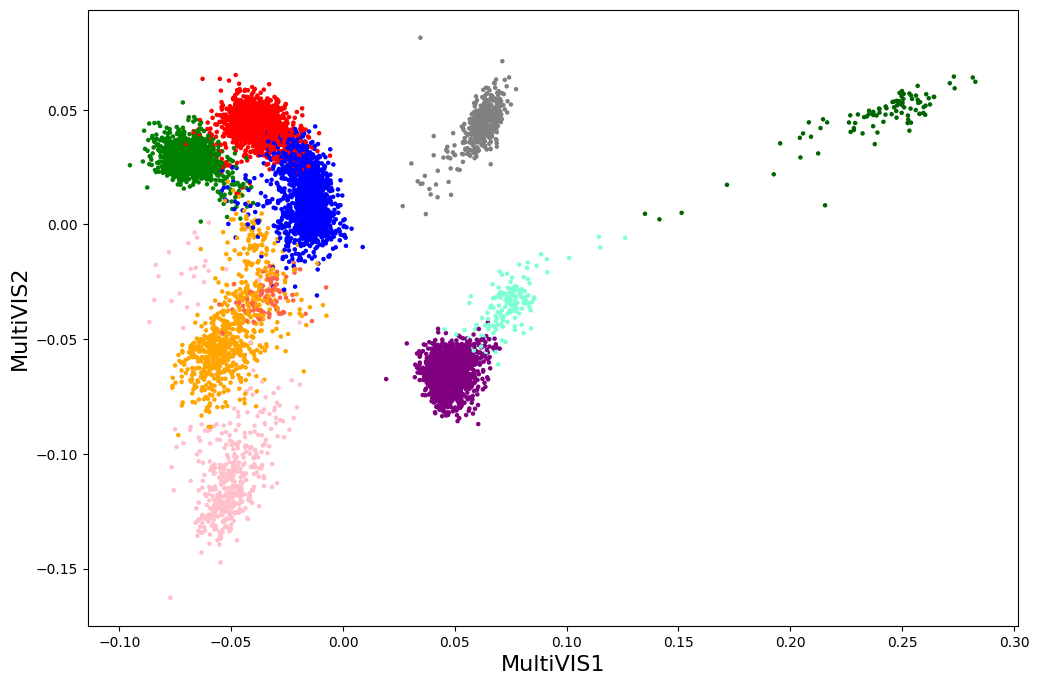

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X_embedding[:,0],X_embedding[:,1],c=cs,s=5)
plt.xlabel("MultiVIS1", fontsize=16)
plt.ylabel("MultiVIS2", fontsize=16)
plt.savefig('/home/chayan/NeuroMDAVIS/Results/Plots/pbmc10k_atacseq_NeuroMDAVIS.eps',
            dpi = 1200, format = 'eps')